
## Toxic Comment Classification Challenge
<b>Authors:</b> Yohannis Telila, Dawit Anelay<br>
<b>Date :</b> 12/04/2021<br>
<b>Course:</b> Human Language Technologies, 2020/2021 A.Y<br>
<b>Lecturer:</b> Prof. Giuseppe Attardi<br>
<b>data set source :</b> https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data


# 1. Data preprocessing and EDA
## 1.1 Understanding data
// Detailed comment coming up . . .

Note : The data is highly unbalanced. read more about it.

Toxic comment classification is a multi-label text classification problem with a highly imbalanced dataset.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')
import gc

In [2]:
# Reading the data
train = pd.read_csv('https://github.com/JoeKifle/Toxic-Comment-Classification/blob/main/data/train.csv?raw=true')
test = pd.read_csv('https://github.com/JoeKifle/Toxic-Comment-Classification/blob/main/data/test.csv?raw=true')
testLabel = pd.read_csv('https://github.com/JoeKifle/Toxic-Comment-Classification/blob/main/data/test_labels.csv?raw=true')
sample = pd.read_csv('https://github.com/JoeKifle/Toxic-Comment-Classification/blob/main/data/sample_submission.csv?raw=true')

In [3]:
testLabel.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


The description states "value of -1 indicates it was not used for scoring", so we will drop all of those rows.

In [4]:
# we are going to remove instances with value -1
test_labels = testLabel[(testLabel[['toxic','severe_toxic', 'obscene', 'threat', 
                                        'insult', 'identity_hate']] != -1).all(axis=1)]
print(test_labels.shape)
test_labels.head(10)

(63978, 7)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,0,0,0,0,0,0
7,000247e83dcc1211,0,0,0,0,0,0
11,0002f87b16116a7f,0,0,0,0,0,0
13,0003e1cccfd5a40a,0,0,0,0,0,0
14,00059ace3e3e9a53,0,0,0,0,0,0
16,000663aff0fffc80,0,0,0,0,0,0
17,000689dd34e20979,0,0,0,0,0,0
19,000844b52dee5f3f,0,0,0,0,0,0
21,00091c35fa9d0465,1,0,0,0,0,0
22,000968ce11f5ee34,0,0,0,0,0,0


In [5]:
# merge with an inner join
test = pd.merge(test_labels, test, on='id', how='inner')
print(test.shape)
test.head(2)

(63978, 8)


,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,0001ea8717f6de06,0,0,0,0,0,0,Thank you for understanding. I think very high...
1,000247e83dcc1211,0,0,0,0,0,0,:Dear god this site is horrible.


In [6]:
print("Train data shape", train.shape)
print("Test data shape", test.shape)

Train data shape (159571, 8)
Test data shape (63978, 8)


In [7]:
train.head(70)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
65,0028d62e8a5629aa,All of my edits are good. Cunts like you who ...,1,0,1,0,1,0
66,00290e2a171dd073,"""\n - NeilN's bang on - You aren't being haras...",0,0,0,0,0,0
67,002918ae66cc4bc2,"I went there around the same time he did, and ...",0,0,0,0,0,0
68,0029541a38c523a0,There must be some chemical imbalance in your ...,0,0,0,0,0,0


In [8]:
train["comment_text"][65]

"All of my edits are good.  Cunts like you who revert good edits because you're too stupid to understand how to write well , and then revert other edits just because you've decided to bear a playground grudge, are the problem.  Maybe one day you'll realise the damage you did to a noble project.  201.215.187.159"

In [9]:
test.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,0001ea8717f6de06,0,0,0,0,0,0,Thank you for understanding. I think very high...
1,000247e83dcc1211,0,0,0,0,0,0,:Dear god this site is horrible.
2,0002f87b16116a7f,0,0,0,0,0,0,"""::: Somebody will invariably try to add Relig..."
3,0003e1cccfd5a40a,0,0,0,0,0,0,""" \n\n It says it right there that it IS a typ..."
4,00059ace3e3e9a53,0,0,0,0,0,0,""" \n\n == Before adding a new product to the l..."


<p>We have our comments in <i>comment_text</i> column and comment labels in binarized format(one hot encoded format)</p>    

In [10]:
# sample comments.
train['comment_text'][1345]

'") (As well as  Strom, ""Mr. Solid South"", himself,"'

### 1.1.1 Checking for class imbalance 

// Detailed comment coming up . . .<br>
// My thought : We can also remove numbers from comment since they dont express any emotion()

In [11]:
print("toxic:", np.count_nonzero(train[['toxic']]))
print("severe_toxic:", np.count_nonzero(train[['severe_toxic']]))
print("threat:",np.count_nonzero(train[['threat']]))
print("identity_hate:",np.count_nonzero(train[['identity_hate']]))

toxic: 15294
severe_toxic: 1595
threat: 478
identity_hate: 1405


In [12]:
print(train.iloc[:,2:].sum().values)

[15294  1595  8449   478  7877  1405]


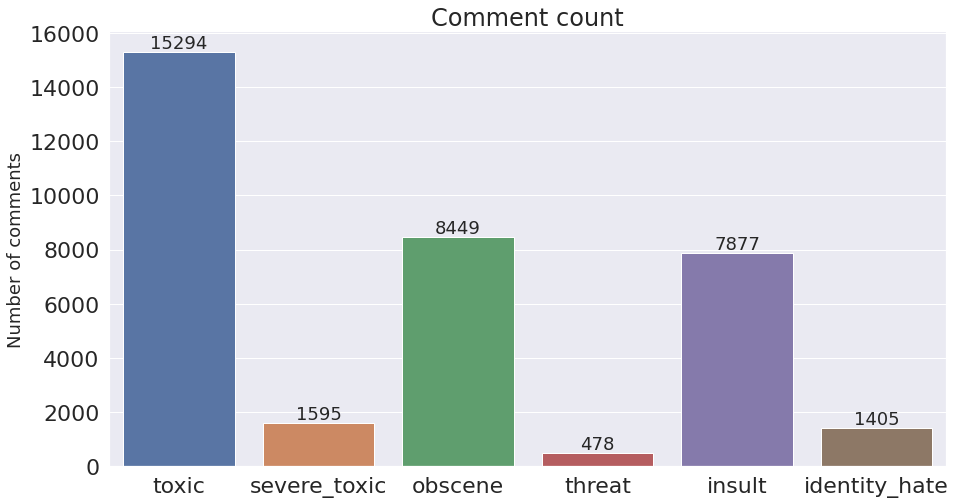

In [13]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
categories = list(train.columns.values)
categories = categories[2:]
ax= sns.barplot(categories, train.iloc[:,2:].sum().values)

plt.title("Comment count", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)


#adding the text labels
rects = ax.patches
labels = train.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

### 1.1.2 Checking for label correlations.
The correlation figure below shows that Toxic" comments are clearly correlated with both "obscene" and "insult" comments. Interestingly, "toxic" and "severe_toxic" are only weakly correlated. While we can also observe that, "Obscene" comments and "insult" comments are also highly correlated, which makes perfect sense. We have considered models that takes in account the possible correlation of class labels. Eg. ClassifierChain.

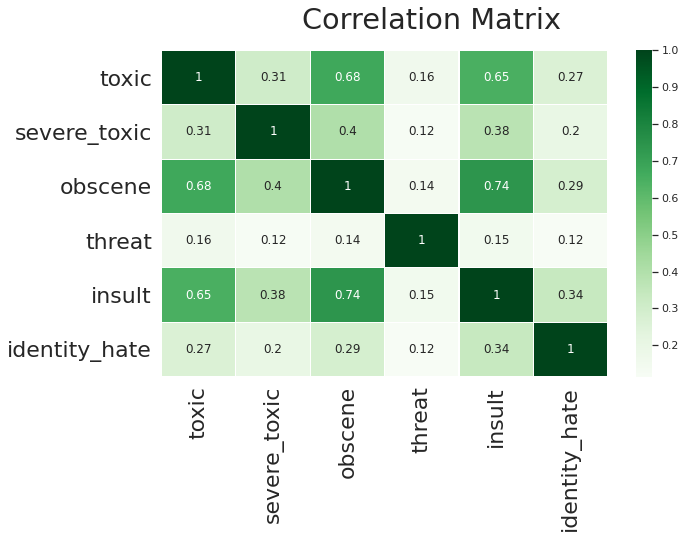

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.set(font_scale=1)
sns.heatmap(train.corr(), annot=True, cmap="Greens", linewidths=.2, ax=ax);

### 1.1.3 Visualizing length of comment.

We can understad that the majority of the comment contain length between 0 and 500. We have few comments containing length of more than 500 length of comment.s

In [15]:
# create a list of all length of the comments.
lenComment = []
for i in range(train.shape[0]):
  lenComment.append(len(train['comment_text'][i]))

average length of comment: 394.073


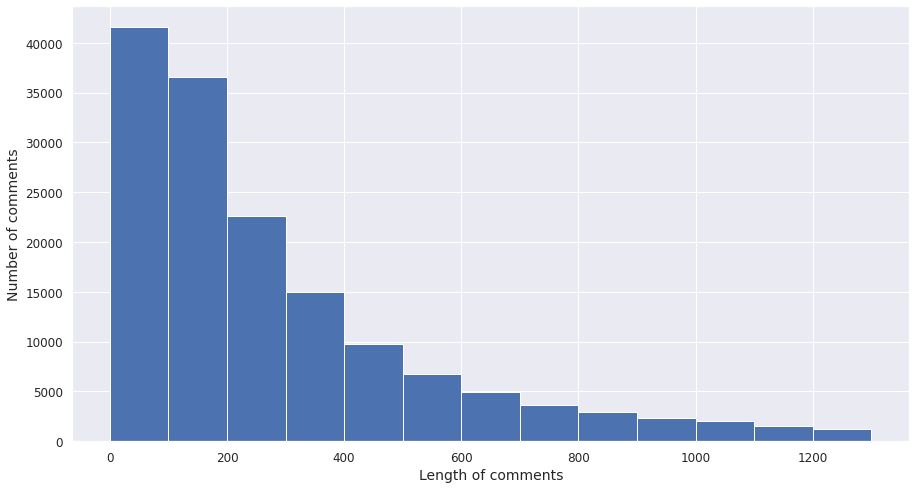

In [16]:
print('average length of comment: {:.3f}'.format(sum(lenComment)/len(lenComment)) )
bins = [1,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300]
plt.figure(figsize=(15,8))
plt.hist(lenComment, bins=bins)
plt.xlabel('Length of comments',fontsize=14)
plt.ylabel('Number of comments',fontsize=14)

#plt.axis([0, 1200, 0, 90000])
plt.tick_params(labelsize=12)

plt.show()

## 1.2 Cleaning up the data 

// Detailed comment coming up . . .<br>
// My thought : We can also remove numbers from comment since they dont express any emotion()

In [17]:
# importing important libraries.
import re
from nltk.stem.snowball import SnowballStemmer
import json
import requests

### 1.2.1 Removing excessive length comments.

Fitting our model on the memomery was a problem for us, so one technique we used is to remove lengthy comments. And More lengthy comments add more words to our dictionary which causes longer training time and decrease training accuracy.


In [18]:
test.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text
0,0001ea8717f6de06,0,0,0,0,0,0,Thank you for understanding. I think very high...
1,000247e83dcc1211,0,0,0,0,0,0,:Dear god this site is horrible.
2,0002f87b16116a7f,0,0,0,0,0,0,"""::: Somebody will invariably try to add Relig..."
3,0003e1cccfd5a40a,0,0,0,0,0,0,""" \n\n It says it right there that it IS a typ..."
4,00059ace3e3e9a53,0,0,0,0,0,0,""" \n\n == Before adding a new product to the l..."


In [19]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [20]:
len(train["comment_text"][159395])

4140

In [21]:
# count the number of comments having the length greater than 40.
# takes 13 minutes to execute this. Think of faster solutions? ** fixed **
# Will remove around 43k data samples.

# Train dataset
trainList = []
for i in range(train.shape[0]):
    if len(train["comment_text"][i])>=400:
        trainList.append(i)
train = train.drop(train.index[trainList])



# Test dataset
testList = []
for i in range(test.shape[0]):
    if len(test["comment_text"][i])>=400:
        testList.append(i)
test = test.drop(test.index[testList])

In [22]:
def clean_comment(comment):
    """
        This function will remove the following contents from the comment.
            * URLs.        * Emails.
            * Months.      * '\n' characters.
            * Digits.      * Non english characters.
    """
    comment = comment.lower()
    comment = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', comment) # clean url
    comment = re.sub(r'(jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|nov(?:ember)?|dec(?:ember)?)','',comment) # clean month
    comment = re.sub(r'\d+', '', comment)                           # clean numbers
    comment = re.sub(r'[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+','',comment) # clean email 
    comment = re.sub(r'\n', '', comment)                            # clean \n
    comment = re.sub(r'([^\x00-\x7F])+','',comment)                 # clean Non-English characters 
    return comment 

In [23]:
# cleaning the test and train test.
train['comment_text'] = train['comment_text'].apply(clean_comment)
test['comment_text'] = test['comment_text'].apply(clean_comment)

In [24]:
train['comment_text'].values[3]

"you, sir, are my hero. any chance you remember what page that's on?"

In [25]:
test['comment_text'].values[3]

'this other one from '

### 1.2.2 Expanding contracted comments.

// Detailed comment coming up . . .


In [26]:
# contracted words list with their expanded form.    # can't to can not 
content = requests.get("https://github.com/JoeKifle/Toxic-Comment-Classification/blob/main/expandedContractions.json?raw=true")
cList = json.loads(content.content)


In [27]:
def expandComment(x):
    if type(x) is str:
        for key in cList:
            value = cList[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [28]:
train['comment_text'] = train['comment_text'].apply(lambda x: expandComment(x))
test['comment_text'] = test['comment_text'].apply(lambda x: expandComment(x))

In [29]:
train["comment_text"].values[43] 

'" dh dude, abc officially says this is the name for that episode. i do know there is already an episode with that name, but abc says it is ""everybody\'s says do not"".   "'

### 1.2.3 Removing Stop Words (or/and Frequent words/ Rare words):
Filtering out unnecessary words. <br>
// More detail comments are coming up.

In [30]:
# importing important libraries.
import nltk
from nltk.corpus import stopwords
#downloading stop english words.
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
train['comment_text'] = train['comment_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
test['comment_text'] = test['comment_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

### 1.2.4 Stemming
For stemming we are going to use SnowballStemmer <br>

// Detailed comment coming up . . .

In [32]:
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [33]:
stemmer = SnowballStemmer("english")
train['comment_text'] = train['comment_text'].apply(stemming)
test['comment_text'] = test['comment_text'].apply(stemming)

In [34]:
train['comment_text'].values[3]

'you, sir, hero. chanc rememb page on?'

In [35]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanationwhi edit made usernam hardcor metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww! match background colour seem stuck with...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, realli tri edit war. guy constant rem...",0,0,0,0,0,0
4,0001d958c54c6e35,"you, sir, hero. chanc rememb page on?",0,0,0,0,0,0
5,00025465d4725e87,"""congratul well, use tool well. talk """,0,0,0,0,0,0


In [36]:
# keeping a copy of the train and test for later use.
trainCopy = train.copy()
testCopy = test.copy()

### 1.3 Word Cloud representation.

Visualize most frequent words in a category.

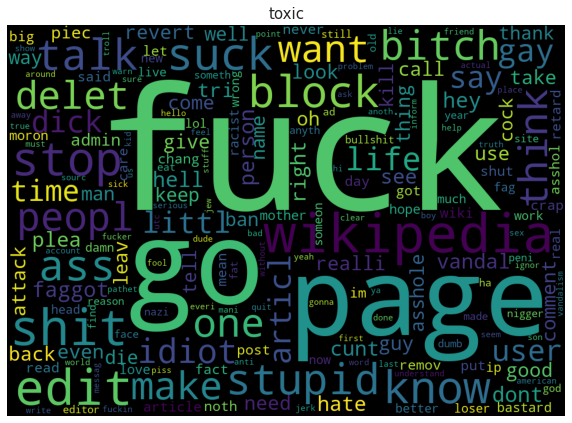

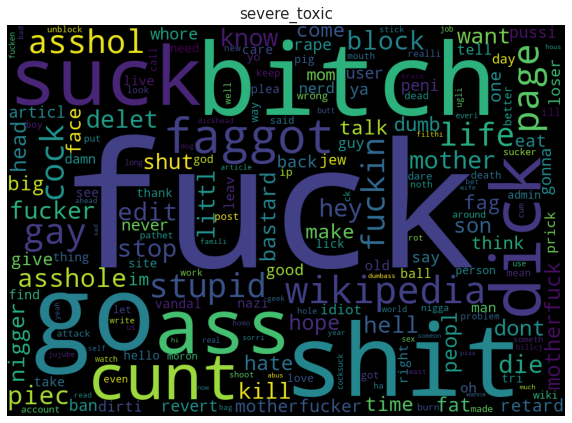

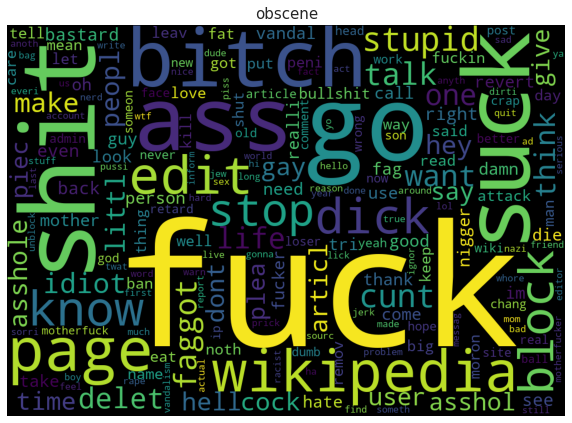

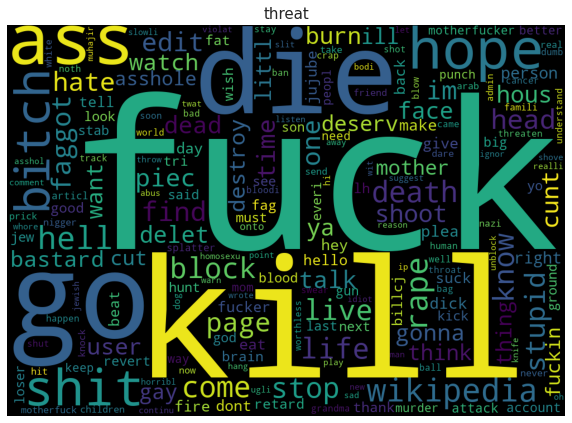

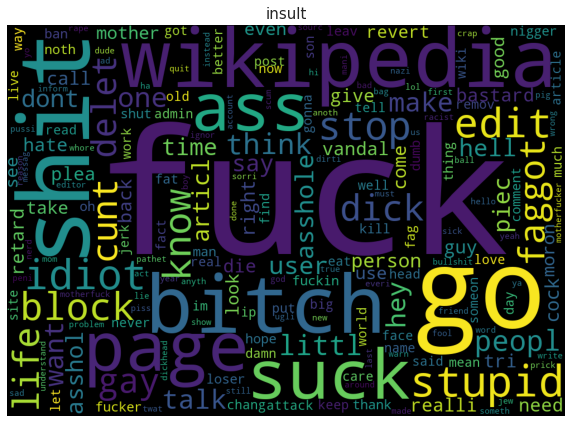

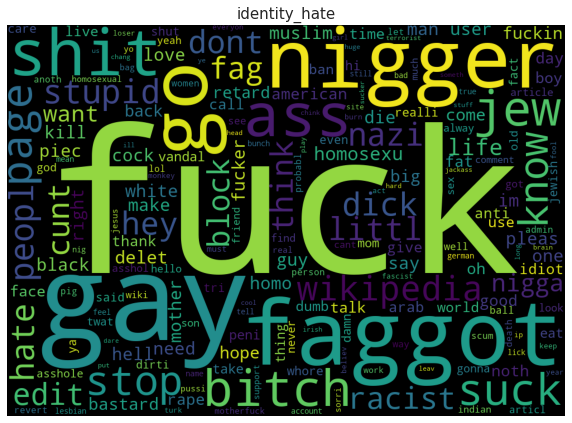

In [37]:
from wordcloud import WordCloud,STOPWORDS
from collections import Counter

categories = ['toxic', 'severe_toxic','obscene','threat','insult','identity_hate']


for cat in categories:

  text = train.loc[train[cat] == 1]['comment_text'].values
  plt.figure(figsize=(10,15))
  cloud_toxic = WordCloud(
                            stopwords=STOPWORDS,
                            background_color='black',
                            collocations=False,
                            width=1000,
                            height=700
                          ).generate(" ".join(text))
  plt.axis('off')
  plt.title(cat,fontsize=15)
  plt.imshow(cloud_toxic)


### 1.4 Vectorizing 

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
X_train = train['comment_text'].values
y_train = train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].values

X_test = test['comment_text'].values
y_test = test[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].values

vectorizing the comments.

In [40]:
def tfidfVectorizer(maxFeature):
  ''''
  Input:
    Int -> Maximum words to consider for the vectorizer. If less than total 
          dictionary, most frequent words will be given priority.

  Return:
     TfidfVectorizer vectorizer obeject.

  '''
  tfv = TfidfVectorizer(min_df=3,  max_features=maxFeature, 
            strip_accents='unicode', analyzer='word',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1)
  return tfv

In [41]:
tfv = tfidfVectorizer(maxFeature=1000)
X_train_vector = tfv.fit_transform(X_train)
X_test_vector = tfv.fit_transform(X_test)

In [42]:
# Saving vectorizer.
#import joblib
#joblib.dump(tfv, 'vectorizer/vectorizer-model.pkl')

In [43]:
X_train_vector.shape

(115803, 1000)

In [44]:
X_test_vector.shape

(47147, 1000)

# 2. Accuracy mertics

For this task we will be using 4 different metrics to evaluate our model. Hamming loss, accuracy_score, log_loss and F1_score.

F1_score:

 > The score closer to 1 means that our model has good performance and we can now deploy it to production.
 > would be great if you have class imbalance)

In [45]:
# importing necessary libraries.
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score

In [46]:
# This function will be used to evaluate the performance of our model.
def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print("Hamming_loss : {}".format(loss*100))
    accuracy = accuracy_score(Y_test,predict)
    print("Accuracy : {}".format(accuracy*100))
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print("Log_loss : {}".format(loss))
    f1scoreMa = f1_score(Y_test, predict,average='macro')
    print("F1-score - Macro Avg : {}".format(f1scoreMa))
    f1scoreMi = f1_score(Y_test, predict,average='micro')
    print("F1-score - Micro Avg : {}".format(f1scoreMi))

# 2.1. Plot learning rate curve for the estimator

In [47]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plot learning rate curve for the estimator with title, training data as X, 
    labels as y.
   
    """
   
    #plt.figure()
    #plt.title(title)
    #if ylim is not None:
    #    plt.ylim(*ylim)
   # plt.xlabel("Training examples")
   # plt.ylabel("Score")
   
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                                            X, y, train_sizes=train_sizes, cv=cv, n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    (fig, ax) = plt.subplots(1, figsize=(10, 10))
    ax.grid(linestyle='-', linewidth='0.5', color='black')
    ax.set_axisbelow(True)
    plt.plot(train_sizes, train_scores_mean,
             label='TR', linewidth=3.0, ls='solid', c='red')

    plt.plot(train_sizes, test_scores_mean,
             label='TS', linewidth=3.0, ls='dotted', c='blue')
    plt.title(title,fontsize=16)
    plt.xlabel('Training examples',fontsize=20)
    plt.ylabel('Score',fontsize=20)
    plt.legend(loc='Best',prop={"size":20})
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(16)
    plt.tight_layout()
    plt.show()
    

# 3. Model 1 : OneVsRest
// More comments coming up. . . <br>

----> We gonna start with a simpler model <------- <br>

The main assumption here is that the labels are mutually exclusive. You do not consider any underlying correlation between the classes in this method.

For instance, it is more like asking simple questions, say, “is the comment toxic or not”, “is the comment threatening or not?”, etc. Also there might be an extensive case of overfitting here, since most of the comments are unlabeled, i,e., most of the comments are clean comments


### -> Model evaluation
For the model evaluation we gonna be using log loss. But later the evaluation matrics was changed to AUC. we gonna do both. 

> Exact Match Ratio (Subset accuracy):
It is the most strict metric, indicating the percentage of samples that have all their labels classified correctly.

> The disadvantage of this measure is that multi-class classification problems have a chance of being partially correct, but here we ignore those partially correct matches.
There is a function in scikit-learn which implements subset accuracy, called as accuracy_score.

We gonna test with <b>accuracy_score</b> for the time being.

Ref: how to deal with class imbalance.
https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

In [52]:
# importing necessary libraries
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [53]:

categories = ['toxic', 'severe_toxic','obscene','threat','insult','identity_hate']


In [56]:
# pipeline
LogReg_pipeline = Pipeline([
                ('clf', LogisticRegression(C=3,solver='sag',penalty='l2'))
            ])

# parameters
param_gridLR = {  # 
    'clf__C': [ 0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2', 'elasticnet'],
    'clf__class_weight': [None, 'balanced'],
    'clf__solver': ['newton-cg','lbfgs','liblinear','sag','saga']
    
    }

# setup the grid search
gridLR = GridSearchCV(LogReg_pipeline, 
                    param_gridLR, 
                    scoring='accuracy',cv=20, n_jobs=-1,verbose=3)
# fit model   
gridLR.fit(X_train_vector, train["toxic"])


Fitting 20 folds for each of 120 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1101 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 2327 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 40.7min finished


GridSearchCV(cv=20, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        LogisticRegression(C=3,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                                  

In [57]:
print(gridLR.best_score_)
print(gridLR.best_estimator_)
print(gridLR.best_params_)

0.943153463969014
Pipeline(memory=None,
         steps=[('clf',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
{'clf__C': 10, 'clf__class_weight': None, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}


## Optimized model

In [58]:
LogReg_pipeline = Pipeline([
                ('clf', LogisticRegression(C=10,solver='liblinear',penalty='l2'))
            ])

for category in categories:
    print('Training {0} comments.'.format(category))
    LogReg_pipeline.fit(X_train_vector, train[category])
    # Saving the model.
    #joblib.dump(LogReg_pipeline, 'models/{0}-clf-model.pkl'.format(category))
    prediction = LogReg_pipeline.predict(X_test_vector)
    prediction = prediction
    evaluate_score(test[category], prediction)
    print("\n")

Training toxic comments.
Hamming_loss : 15.150486775404588
Accuracy : 84.84951322459541
Log_loss : 5.232824786908874
F1-score - Macro Avg : 0.48371972651120787
F1-score - Micro Avg : 0.8484951322459542


Training severe_toxic comments.
Hamming_loss : 0.5769189980274461
Accuracy : 99.42308100197256
Log_loss : 0.19926083054712856
F1-score - Macro Avg : 0.4985535300248878
F1-score - Micro Avg : 0.9942308100197256


Training obscene comments.
Hamming_loss : 8.40774598595881
Accuracy : 91.59225401404119
Log_loss : 2.903944949539792
F1-score - Macro Avg : 0.4898575471699143
F1-score - Micro Avg : 0.9159225401404119


Training threat comments.
Hamming_loss : 0.40935796551212167
Accuracy : 99.59064203448787
Log_loss : 0.14138741891932766
F1-score - Macro Avg : 0.49897450611576927
F1-score - Micro Avg : 0.9959064203448788


Training insult comments.
Hamming_loss : 6.984537722442573
Accuracy : 93.01546227755743
Log_loss : 2.412378072170098
F1-score - Macro Avg : 0.4843212593217513
F1-score - Mic

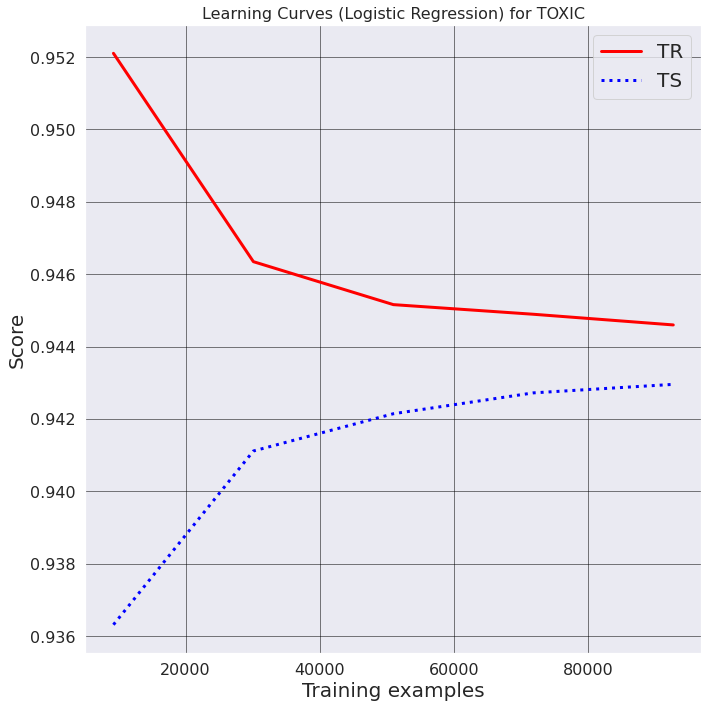

In [59]:
title = "Learning Curves (Logistic Regression) for TOXIC"
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)

plot_learning_curve(LogReg_pipeline, title, X_train_vector,
                    train['toxic'], ylim=(0.7, 1.01), cv=cv, n_jobs=-1)

# 4. Model 2 - Classifier chain with LR
> Model ref: https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.ClassifierChain.html#sklearn.multioutput.ClassifierChain.fit <br>
> Model ref: https://github.com/scikit-multilearn/scikit-multilearn <br>
> More ref: https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff

In [61]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 5.0MB/s 


In [63]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

## 4.1 Data Sampling for Model 2
Since we have large dataset, it would be impossible to fit the data into our memory to learn. It has been causing memory full error and we need to sample down the data.

Ref: https://www.marsja.se/pandas-sample-randomly-select-rows/

We will sample these two data sets. We have many options to do so. One way is to do random sampling.

In [ ]:
trainCopy.shape

(115803, 8)

In [ ]:
testCopy.shape

(47147, 8)

In [69]:
train10000 = trainCopy.sample(n=15000, replace=True,random_state=7601)

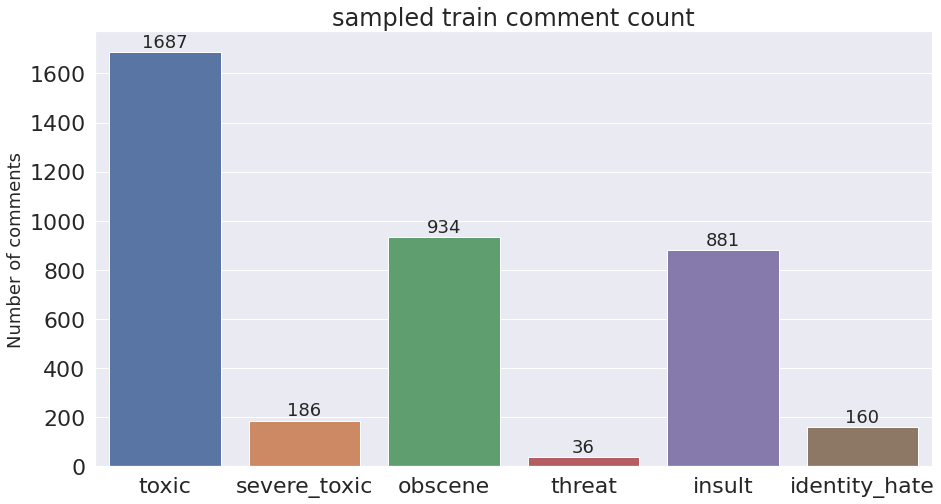

In [ ]:
sns.set(font_scale = 2)
plt.figure(figsize=(15,8))
categories = list(train10000.columns.values)
categories = categories[2:]
ax= sns.barplot(categories, train10000.iloc[:,2:].sum().values)

plt.title("sampled train comment count", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)


#adding the text labels
rects = ax.patches
labels = train10000.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

In [66]:
test1000 =   testCopy.sample(n=5000, replace=True,random_state=7601)

In [70]:
X_train10000 = train10000['comment_text'].values
y_train10000 = train10000[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

X_test1000 = test1000['comment_text'].values
y_test1000 = test1000[['toxic','severe_toxic','obscene','threat','insult','identity_hate']]

In [71]:
# Vectorizing the sampled data.
tfv2 = tfidfVectorizer(maxFeature=4000)
X_train10000_vector = tfv2.fit_transform(X_train10000)
X_test1000_vector = tfv2.fit_transform(X_test1000)

In [72]:
X_train10000_vector.shape

(15000, 4000)

In [73]:
X_test1000_vector.shape

(5000, 4000)

In [ ]:
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression(C=1, penalty='l2',solver='newton-cg')) #,
# Training logistic regression model on train data
classifier.fit(X_train10000_vector, y_train10000)
# predict

ClassifierChain(classifier=LogisticRegression(C=1, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l2', random_state=None,
                                              solver='newton-cg', tol=0.0001,
                                              verbose=0, warm_start=False),
                order=None, require_dense=[True, True])

In [ ]:
predictions = classifier.predict(X_test1000_vector)
# accuracy
#print("Accuracy = ",accuracy_score(y_test1000,np.round(predictions.A)))
evaluate_score(y_test1000,y_test1000*)
print("\n")
# The F1 score is not good for this because, unless all classes are classified correctly, wont be considered correct estimate.

Hamming_loss : 4.553333333333334
Accuracy : 87.96000000000001
Log_loss : 0.4895086869931047
F1-score - Macro Avg : 0.0
F1-score - Micro Avg : 0.0




In [ ]:
predictions.toarray()[0]     np.round(predictions.toarray())

array([0., 0., 0., 0., 0., 0.])

In [ ]:
type(y_test1000)  The name is not easy aas you might think of the day.

pandas.core.frame.DataFrame

## 4.2 Hyperparameter tuning ClassifierChain.

We can also do an optimizer on which estimator to use.

In [ ]:
print(np.logspace(-4, 4, 20))

[1.00000000e-04 2.63665090e-04 6.95192796e-04 1.83298071e-03
 4.83293024e-03 1.27427499e-02 3.35981829e-02 8.85866790e-02
 2.33572147e-01 6.15848211e-01 1.62377674e+00 4.28133240e+00
 1.12883789e+01 2.97635144e+01 7.84759970e+01 2.06913808e+02
 5.45559478e+02 1.43844989e+03 3.79269019e+03 1.00000000e+04]


In [ ]:
# Lets do hyperparameter tuning.
# setup the pipeline
pipeline= Pipeline([('estimator', ClassifierChain(LogisticRegression()))])

# setup the parameter grid
param_grid = {  # 
    'estimator__classifier__C': [0.001,0.01,0.1,1,10,100],
    'estimator__classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'estimator__classifier__solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
    
    } 

In [ ]:
# setup the grid search
grid = GridSearchCV(pipeline, 
                    param_grid, 
                    scoring='accuracy',cv=20, n_jobs=-1,verbose=3)
# fit model   
grid.fit(X_train10000_vector, y_train10000)

Fitting 20 folds for each of 90 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 19.4min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed: 51.8min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 115.9min


In [ ]:
grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__estimator', 'estimator__estimator__classifier', 'estimator__estimator__classifier__C', 'estimator__estimator__classifier__class_weight', 'estimator__estimator__classifier__dual', 'estimator__estimator__classifier__fit_intercept', 'estimator__estimator__classifier__intercept_scaling', 'estimator__estimator__classifier__l1_ratio', 'estimator__estimator__classifier__max_iter', 'estimator__estimator__classifier__multi_class', 'estimator__estimator__classifier__n_jobs', 'estimator__estimator__classifier__penalty', 'estimator__estimator__classifier__random_state', 'estimator__estimator__classifier__solver', 'estimator__estimator__classifier__tol', 'estimator__estimator__classifier__verbose', 'estimator__estimator__classifier__warm_start', 'estimator__estimator__require_dense', 'estimator__estimator__order', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_tra

In [ ]:
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

{'estimator__classifier__C': 11.288378916846883,
 'estimator__classifier__penalty': 'l1',
 'estimator__classifier__solver': 'saga'}

In [87]:
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression(C=0.5, penalty='l1',solver='saga')) #,
# Training logistic regression model on train data
classifier.fit(X_train10000_vector, y_train10000)
# predict

ClassifierChain(classifier=LogisticRegression(C=0.5, class_weight=None,
                                              dual=False, fit_intercept=True,
                                              intercept_scaling=1,
                                              l1_ratio=None, max_iter=100,
                                              multi_class='auto', n_jobs=None,
                                              penalty='l1', random_state=None,
                                              solver='saga', tol=0.0001,
                                              verbose=0, warm_start=False),
                order=None, require_dense=[True, True])

In [88]:
predictions = classifier.predict(X_test1000_vector)
# accuracy
evaluate_score(y_test1000,np.round(predictions.A))
print("\n")

Hamming_loss : 5.003333333333333
Accuracy : 86.28
Log_loss : 0.5648528039630012
F1-score - Macro Avg : 0.009868856593690372
F1-score - Micro Avg : 0.020874103065883887




In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve    
title = "Classifier chain with Logistic Regression  classifier"
cv = ShuffleSplit(n_splits=20, test_size=0.1, random_state=0)

plot_learning_curve(classifier, title,X_train10000_vector,
                    y_train10000, ylim=(0.5, 1), cv=cv, n_jobs=-1)

## Classifier chain with NB

In [ ]:
from skmultilearn.problem_transform import ClassifierChain
classifier = ClassifierChain(MultinomialNB()).fit(X_train10000_vector, y_train10000)


In [ ]:
#predictions
predictions = classifier1.predict(X_test1000_vector) 

In [ ]:
# calculate results
#calculate scores
evaluate_score(y_test1000,np.round(predictions))

In [ ]:
title = "Classifier chain with MultinomialNB classifier "
cv = ShuffleSplit(n_splits=20, test_size=0.1, random_state=0)

plot_learning_curve(classifier, title,X_train10000_vector,
                    y_train10000, ylim=(0.5, 1), cv=cv, n_jobs=-1) 


## 4. Model 3 - Binary Relevance with SVC

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
classifier = BinaryRelevance(classifier = SVC(C=10,gamma=0.1,kernel='rbf'), require_dense = [False, True])
classifier.fit(X_train10000_vector, y_train10000)

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
#predictions
predictions = classifier.predict(X_test1000_vector) 

In [ ]:
#calculate scores
evaluate_score(y_test1000,np.round(predictions))

Accuracy =  0.794


Hamming_loss : 8.99
Accuracy : 79.4
Log_loss : 0.8248594755071548
F1-score - Macro Avg : 0.026091892527871766
F1-score - Micro Avg : 0.05001761183515323


In [ ]:
title = "Learning Curves (BR Method with SVM classifier) "
cv = ShuffleSplit(n_splits=20, test_size=0.1, random_state=0)

plot_learning_curve(classifier, title,X_train10000_vector,
                    y_train10000, ylim=(0.5, 1), cv=cv, n_jobs=-1) 

#5. Label Powerset with MultinomialNB classifier

In [76]:
from skmultilearn.problem_transform import LabelPowerset
classifier = LabelPowerset(MultinomialNB()))
classifier.fit(X_train10000_vector, y_train10000)
#predictions
predictions = classifier.predict(X_test1000_vector) 

In [83]:
# calculate results
#calculate scores
evaluate_score(y_test1000,predictions)

Hamming_loss : 5.17
Accuracy : 86.36
Log_loss : 0.4886533537693014
F1-score - Macro Avg : 0.0014814814814814812
F1-score - Micro Avg : 0.0038535645472061657


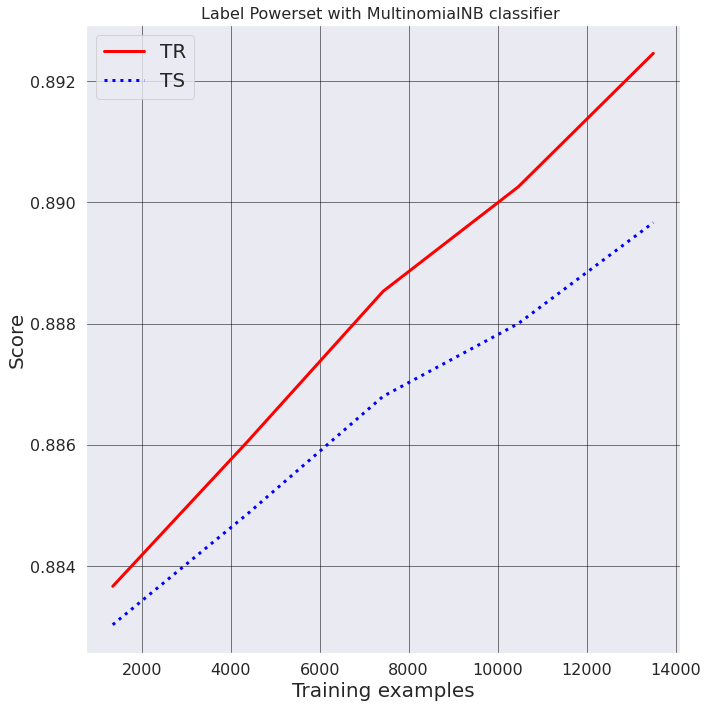

In [84]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve    
title = "Label Powerset with MultinomialNB classifier "
cv = ShuffleSplit(n_splits=20, test_size=0.1, random_state=0)

plot_learning_curve(classifier, title,X_train10000_vector,
                    y_train10000, ylim=(0.5, 1), cv=cv, n_jobs=-1)

# 7. NN

Ref: https://www.kaggle.com/brittabettendorf/visualizations-deep-learning-cnn-rnn-glove



## 7.1 Preparation.
### 7.1.1 Importing important libraries
> Note: Embedding layers are alternative to one-hot-encoding. The tokenizer will just assign a number to the text.

In [47]:
# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 
from keras.models import Model, Input, Sequential

from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D,Conv2D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence
from keras import regularizers
from keras import optimizers

In [48]:
# importing libraries
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
import gensim.models.keyedvectors as word2vec

### 7.1.2 Tekenizing

In [49]:
num_words = 20000 #the maximum number of words to keep, based on word frequency. 
max_len = 300 #Max. number of words per toxic comment to be used
num_epochs = 25 #number of epochs (number of times that the model is exposed to the training dataset)
val_split = 0.1
batch_size2 = 256 
# In general, larger batch sizes result in faster progress in training, but don't always converge as quickly. 
#Smaller batch sizes train slower, but can converge faster. And the higher the batch size, the more memory space you’ll need.


In [50]:
# Expermenting with tokenizer on how it works. --> dummy test.

# define 5 documents
docs = ['Well done well!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent work!']
# create the tokenizer
t = Tokenizer(num_words=2)
# fit the tokenizer on the documents
t.fit_on_texts(docs)

In [51]:
#print(t.word_counts)
#print(t.document_count)
print(t.word_index)
#print(t.word_docs)

{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}


In [52]:
t_train = t.texts_to_sequences(['I have a good work nice effort well nice work work friend','great effort'])

In [53]:
t_train

[[1, 1, 1], []]

In [54]:
#toxic comments Tokenization
tokenizer= Tokenizer(num_words)
# This tokenizer creates like a dictiory of words with their number.
# You can see the dictionary like this [tokenizer.word_index.keys()]
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized toxic commnent to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
 
# padding the sequences
X_train = sequence.pad_sequences(X_train, max_len)
X_test  = sequence.pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (115803, 300)
X_test shape:  (47147, 300)


In [55]:
tokenizer.num_words

20000

### 7.1.3 Word Embedding. 

In [56]:
# Downloading the embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
!unzip -q GoogleNews-vectors-negative300.bin.gz

--2021-07-05 12:54:14--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-05 12:54:14--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-05 12:54:15--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [57]:
def loadEmbedding(embeddingType):

  embeddings_index = dict() 

  if(embeddingType=="glove"):
    gloveFile = open('/content/glove.6B.300d.txt')

    for line in gloveFile:
        # Note: use split(' ') instead of split() if you get an error
        values = line.split(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    gloveFile.close()
    

  elif(embeddingType=="word2vec"):
    word2vecDict = word2vec.KeyedVectors.load_word2vec_format("/content/GoogleNews-vectors-negative300.bin.gz", binary=True)
    for word in word2vecDict.wv.vocab:
        embeddings_index[word] = word2vecDict.word_vec(word)
    print('Loaded %s word vectors.' % len(embeddings_index))
    
  return embeddings_index
  

In [62]:
# Building glove embedding vector. you can choose either "glove" or "word2vec"
wrdEmbedding = loadEmbedding("word2vec")
# create a weight matrix
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 300))
for word, i in tokenizer.word_index.items():
    embedding_vector = wrdEmbedding.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector  

Loaded 3000000 word vectors.


In [63]:
embedding_matrix.shape

(91494, 300)

In [64]:
len(tokenizer.word_index.items())

91493

# 8. CNN with GLOV and Word2Vec pre-trained embedding

We gonna be using pre-trained glov word embedding.(Global vector)

In [68]:
#model training
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)
callbacks_list = [early_stopping]

In [ ]:
# instantiate pretrained glove model
nnG_modelT = Sequential()
nnG_modelT.add(Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embedding_matrix.shape[1], 
                          weights=[embedding_matrix], trainable=False))

nnG_modelT.add(Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'))
nnG_modelT.add(BatchNormalization())
nnG_modelT.add(GlobalMaxPool1D())
nnG_modelT.add(Dropout(0.4))
nnG_modelT.add(Dense(50, activation='relu'))
nnG_modelT.add(Dense(6, activation='sigmoid'))

In [ ]:
nnG_modelT.compile(loss='binary_crossentropy',
                    optimizer=Adam(0.01),
                    metrics=['accuracy'])

nnG_modelT.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          27448200  
_________________________________________________________________
conv1d (Conv1D)              (None, 300, 100)          120100    
_________________________________________________________________
batch_normalization (BatchNo (None, 300, 100)          400       
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3

In [ ]:
nnG_modelHistory = nnG_modelT.fit(X_train, y_train, batch_size=32, 
                             epochs=3, validation_split=0.2,callbacks=callbacks_list)

Epoch 1/3
2896/2896 [==============================] - 452s 150ms/step - loss: 0.1269 - accuracy: 0.8493 - val_loss: 0.0736 - val_accuracy: 0.9897
Epoch 2/3
2896/2896 [==============================] - 434s 150ms/step - loss: 0.0729 - accuracy: 0.9611 - val_loss: 0.0699 - val_accuracy: 0.9915
Epoch 3/3
2896/2896 [==============================] - 436s 151ms/step - loss: 0.0683 - accuracy: 0.9505 - val_loss: 0.0701 - val_accuracy: 0.9933


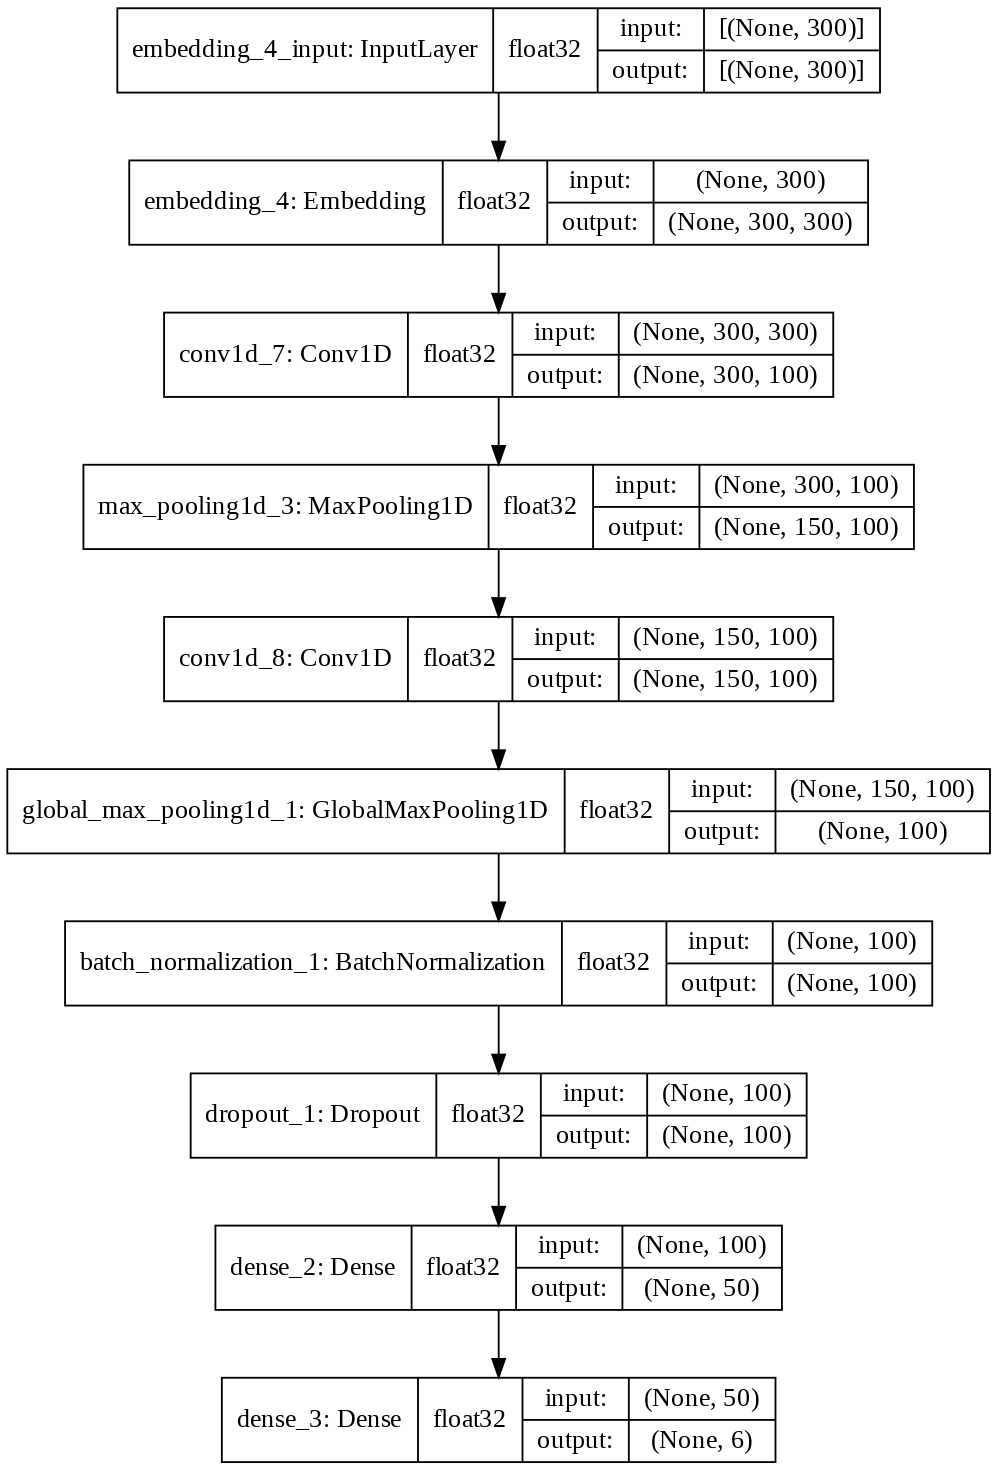

In [ ]:

plot_model(nnG_model, to_file='Cnn_model_plot.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=132)
Image(retina=True, filename='Cnn_model_plot.png')

In [ ]:
predicted = nnG_modelT.predict(X_test)
evaluate_score(y_test,np.round(predicted))
print("\n")

Hamming_loss : 3.398236720611421
Accuracy : 85.67459223280378
Log_loss : 2.802877699008718
F1-score - Macro Avg : 0.3004488598874497
F1-score - Micro Avg : 0.5964485118173042




In [ ]:
predicted = nnG_modelT.predict(X_test)
evaluate_score(y_test,np.round(predicted))
print("\n")

Hamming_loss : 3.544587495846325
Accuracy : 84.86436040469171
Log_loss : 2.4669779626062005
F1-score - Macro Avg : 0.3255896284691752
F1-score - Micro Avg : 0.618179048779559




In [ ]:
# Saving and loading model
#nnG_model.save("models/cnnModel.h5")
#from keras.models import load_model
#loadedModel = load_model('models/cnnModel.h5')

In [ ]:
loadedModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 300)          27448200  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 300)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 100)          120100    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200, 100)          400       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)               

# 9. CNN With self Embedding Layer

In [ ]:

# importing libraries
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.models import Model, Input, Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

In [ ]:
# number of unique words we want to use (or: number of rows in incoming embedding vector)
max_features = 20000 
max_len = 200       # input max length.
embedding_dims = 128 # learned final embedding dimention. The word will be incoded into 128 vector number.

In [ ]:

# embedding layer is like a look-up table which is going to be a matrix of size ([max_feature X output_dim])

nn_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    BatchNormalization(),
    GlobalMaxPool1D(),
    Dropout(0.4),
    Dense(50, activation='relu'),
    Dense(6, activation='sigmoid')
])

In [ ]:
nn_model.compile(loss='binary_crossentropy',
                   optimizer=Adam(0.01), metrics=['accuracy'])

# check the model with all our layers
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
conv1d (Conv1D)              (None, 200, 100)          51300     
_________________________________________________________________
batch_normalization_4 (Batch (None, 200, 100)          400       
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 6)                

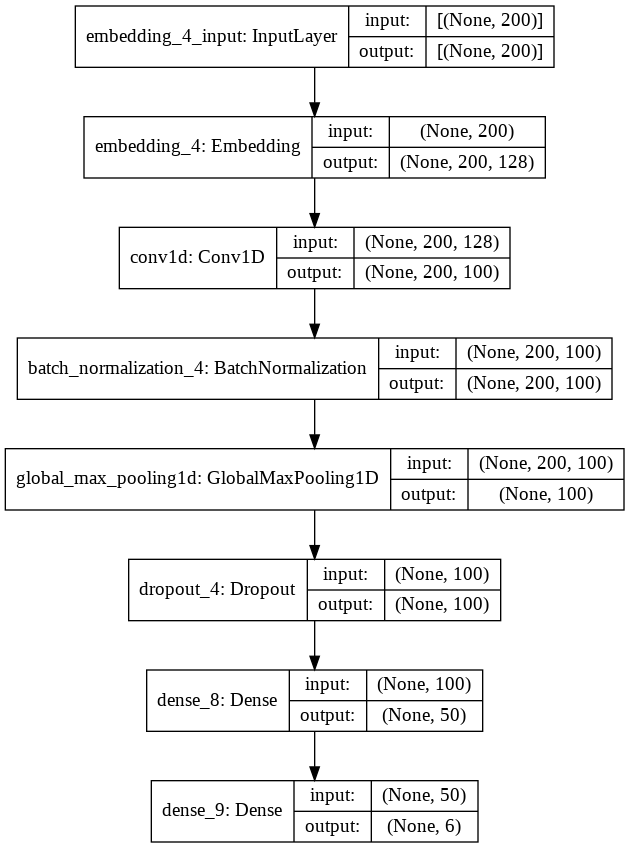

In [ ]:
#plot the nn_model architecture

plot_model(nn_model, to_file='nn_model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='nn_model_plot.png')


In [1]:
nnModel_hist = nn_model.fit(X_train, y_train, batch_size=32, epochs=3, validation_split=0.2,callbacks=callbacks_list)

In [ ]:
predicted = nn_model.predict(X_test)
evaluate_score(y_test,np.round(predicted))
print("\n")

Hamming_loss : 3.5870080104071658
Accuracy : 84.92374912507688
Log_loss : 2.161956472629671
F1-score - Macro Avg : 0.34222142234672753
F1-score - Micro Avg : 0.6323683924495489




In [ ]:
#plot accuracy
plt.figure(figsize=(15, 7))
plt.plot(range(epochs), history.history['accuracy'])
plt.plot(range(epochs), history.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

# 9. LSTM

Paper : https://arxiv.org/pdf/1611.06639.pdf

In [ ]:
# number of unique words we want to use (or: number of rows in incoming embedding vector)
max_features = 20000 
max_len = 200 
embedding_dims = 128

In [ ]:
rnn_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len,output_dim=embedding_dims),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    Bidirectional(LSTM(25, return_sequences=True)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    GlobalMaxPool1D(),
    Dropout(0.2),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

In [ ]:
rnn_model.compile(loss='binary_crossentropy',
                  optimizer=Adam(0.01),
                  metrics=['accuracy'])

rnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
bidirectional_6 (Bidirection (None, 200, 50)           30800     
_________________________________________________________________
batch_normalization_7 (Batch (None, 200, 50)           200       
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_15 (Dense)             (None, 6)                

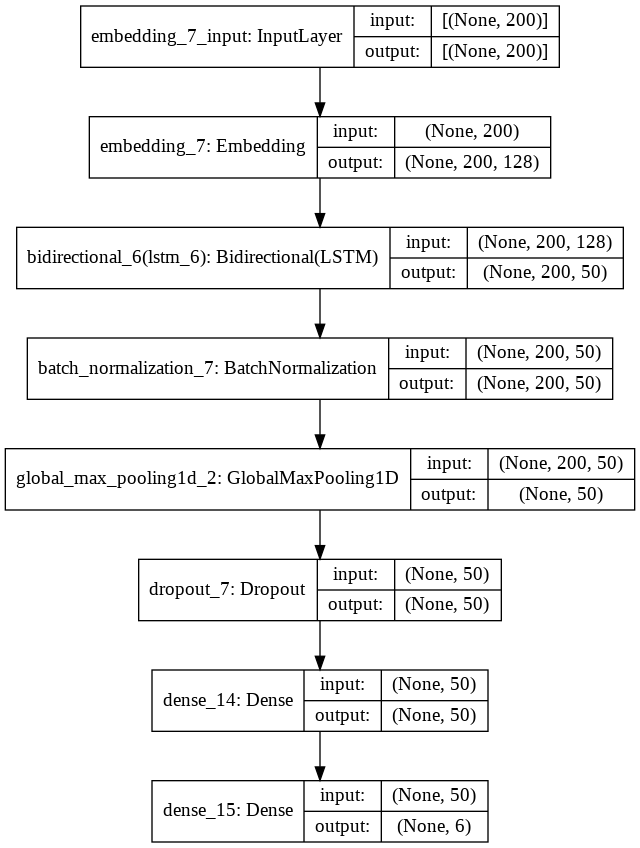

In [ ]:
#plot the RNN model architecture

plot_model(rnn_model, to_file='rnn_model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='rnn_model_plot.png')

In [ ]:
rnn_hist = rnn_model.fit(X_train, y_train, batch_size=64,epochs=3, validation_split=0.3,callbacks=callbacks_list)

Epoch 1/3
1267/1267 [==============================] - 548s 428ms/step - loss: 0.0857 - accuracy: 0.9324 - val_loss: 0.0598 - val_accuracy: 0.9944
Epoch 2/3
1267/1267 [==============================] - 542s 428ms/step - loss: 0.0554 - accuracy: 0.9826 - val_loss: 0.0618 - val_accuracy: 0.9943
Epoch 3/3
1267/1267 [==============================] - 542s 428ms/step - loss: 0.0488 - accuracy: 0.9856 - val_loss: 0.0608 - val_accuracy: 0.9944


In [ ]:
#result of RNN with Glove
predicted = rnn_model.predict(X_test)
evaluate_score(y_test,np.round(predicted))
print("\n")

Hamming_loss : 3.4325266365481015
Accuracy : 85.69792351581225
Log_loss : 2.217422377345878
F1-score - Macro Avg : 0.32545117883196273
F1-score - Micro Avg : 0.634109578717311




In [ ]:
#result of RNN with Word2Vec
predicted = rnn_model.predict(X_test)
evaluate_score(y_test,np.round(predicted))
print("\n")

Hamming_loss : 3.1193218373738874
Accuracy : 87.63866205697074
Log_loss : 2.072911451883725
F1-score - Macro Avg : 0.3703499461344222
F1-score - Micro Avg : 0.623163648787154




In [ ]:
predicted = rnn_model.predict(X_test)
evaluate_score(y_test,np.round(predicted))
print("\n")

Hamming_loss : 3.543880487270311
Accuracy : 86.06698199249156
Log_loss : 1.8436512689483044
F1-score - Macro Avg : 0.3274506231667041
F1-score - Micro Avg : 0.6345375669862564




In [ ]:
#plot accuracy
plt.figure(figsize=(15, 7))
plt.plot(range(3), history.history['accuracy'])
plt.plot(range(3), history.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

NameError: ignored

<Figure size 1080x504 with 0 Axes>

In [ ]:
#pred = rnn_model.predict(X_test)
evaluate_score(y_test,np.round(pred))
print("\n")

Hamming_loss : 3.6859892110491304
Accuracy : 84.72225168091289
Log_loss : 2.00674302141004
F1-score : 0.3273402991804033




# 10. LSTM with word embeddings

In [ ]:
rnn_modelEmb = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embedding_matrix.shape[1], 
                          weights=[embedding_matrix], trainable=False),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    Bidirectional(LSTM(25, return_sequences=True)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    BatchNormalization(),
    GlobalMaxPool1D(),
    Dropout(0.2),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

In [ ]:
rnn_modelEmb.compile(loss='binary_crossentropy',
                  optimizer=Adam(0.01),
                  metrics=['accuracy'])

rnn_modelEmb.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 200, 300)          27448200  
_________________________________________________________________
bidirectional_7 (Bidirection (None, 200, 50)           65200     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 64)           12864     
_________________________________________________________________
batch_normalization_8 (Batch (None, 200, 64)           256       
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)               

In [ ]:
rnn_histE = rnn_modelEmb.fit(X_train, y_train, batch_size=32,epochs=3, validation_split=0.3,callbacks=callbacks_list)

Epoch 1/3
2534/2534 [==============================] - 844s 331ms/step - loss: 0.0853 - accuracy: 0.9325 - val_loss: 0.0692 - val_accuracy: 0.9943
Epoch 2/3
2534/2534 [==============================] - 815s 321ms/step - loss: 0.0632 - accuracy: 0.9938 - val_loss: 0.0648 - val_accuracy: 0.9944
Epoch 3/3
2534/2534 [==============================] - 808s 319ms/step - loss: 0.0619 - accuracy: 0.9868 - val_loss: 0.0682 - val_accuracy: 0.9808


In [ ]:
predicted = rnn_modelEmb.predict(X_test)
evaluate_score(y_test,np.round(predicted))
print("\n")

Hamming_loss : 3.476007663972964
Accuracy : 85.84003223959107
Log_loss : 2.0509956653447796
F1-score - Macro Avg : 0.3238262622100468
F1-score - Micro Avg : 0.6277211978949759




# 10. Bi-LSTM + CNN
paper ref : 

In [69]:
rnn_modelCnn = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embedding_matrix.shape[1], 
                          weights=[embedding_matrix], trainable=False),
    Bidirectional(LSTM(25, return_sequences=True)),
    Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    #BatchNormalization(),
    
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    GlobalMaxPool1D(),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

In [70]:
rnn_modelCnn.compile(loss='binary_crossentropy',
                  optimizer=Adam(0.01),
                  metrics=['accuracy'])

rnn_modelCnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          27448200  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300, 50)           65200     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 64)           12864     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3250      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

In [71]:
rnn_cnn_hist = rnn_modelCnn.fit(X_train, y_train, batch_size=32,epochs=2, validation_split=0.3,callbacks=callbacks_list)

Epoch 1/2
2534/2534 [==============================] - 805s 307ms/step - loss: 0.0916 - accuracy: 0.9100 - val_loss: 0.0677 - val_accuracy: 0.9944
Epoch 2/2
2534/2534 [==============================] - 780s 308ms/step - loss: 0.0661 - accuracy: 0.9484 - val_loss: 0.0682 - val_accuracy: 0.9944


In [72]:
# with Word2vec
predicted = rnn_modelCnn.predict(X_test)
evaluate_score(y_test,np.round(predicted))
print("\n")

Hamming_loss : 3.16633790767882
Accuracy : 88.14134515451673
Log_loss : 1.9056330840908782
F1-score - Macro Avg : 0.36614139796664674
F1-score - Micro Avg : 0.5999374692929563




### Different size of Kernel Test

In [85]:
rnn_modelCnnK32 = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embedding_matrix.shape[1], 
                          weights=[embedding_matrix], trainable=False),
    Bidirectional(LSTM(25, return_sequences=True)),
    Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    #BatchNormalization(),
    
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    GlobalMaxPool1D(),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])
rnn_modelCnnK32.compile(loss='binary_crossentropy',
                  optimizer=Adam(0.01),
                  metrics=['accuracy'])

rnn_modelCnnK128 = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embedding_matrix.shape[1], 
                          weights=[embedding_matrix], trainable=False),
    Bidirectional(LSTM(25, return_sequences=True)),
    Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    #BatchNormalization(),
    
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    GlobalMaxPool1D(),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])

rnn_modelCnnK128.compile(loss='binary_crossentropy',
                  optimizer=Adam(0.01),
                  metrics=['accuracy'])


rnn_modelCnnK13 = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len,
                          output_dim=embedding_matrix.shape[1], 
                          weights=[embedding_matrix], trainable=False),
    Bidirectional(LSTM(25, return_sequences=True)),
    Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'),
    #BatchNormalization(),
    
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    GlobalMaxPool1D(),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dense(6, activation = 'sigmoid')
])


rnn_modelCnnK13.compile(loss='binary_crossentropy',
                  optimizer=Adam(0.01),
                  metrics=['accuracy'])

In [74]:
rnn_cnn_hist32 = rnn_modelCnnK32.fit(X_train, y_train, batch_size=32,epochs=2, validation_split=0.3,callbacks=callbacks_list)

Epoch 1/2
2534/2534 [==============================] - 792s 311ms/step - loss: 0.0897 - accuracy: 0.9053 - val_loss: 0.0655 - val_accuracy: 0.9944
Epoch 2/2
2534/2534 [==============================] - 795s 314ms/step - loss: 0.0655 - accuracy: 0.9888 - val_loss: 0.0686 - val_accuracy: 0.9944


In [75]:
rnn_cnn_hist128 = rnn_modelCnnK128.fit(X_train, y_train, batch_size=32,epochs=2, validation_split=0.3,callbacks=callbacks_list)

Epoch 1/2
2534/2534 [==============================] - 787s 309ms/step - loss: 0.0880 - accuracy: 0.9103 - val_loss: 0.0673 - val_accuracy: 0.9944
Epoch 2/2
2534/2534 [==============================] - 787s 310ms/step - loss: 0.0652 - accuracy: 0.9691 - val_loss: 0.0653 - val_accuracy: 0.9944


In [86]:
rnn_modelCnnK13H = rnn_modelCnnK13.fit(X_train, y_train, batch_size=32,epochs=2, validation_split=0.3,callbacks=callbacks_list)

Epoch 1/2
2534/2534 [==============================] - 806s 316ms/step - loss: 0.0870 - accuracy: 0.9337 - val_loss: 0.0669 - val_accuracy: 0.9944
Epoch 2/2
2534/2534 [==============================] - 760s 300ms/step - loss: 0.0642 - accuracy: 0.9708 - val_loss: 0.0696 - val_accuracy: 0.9944


In [81]:
# with Word2vec
predicted32 = rnn_modelCnnK32.predict(X_test)
evaluate_score(y_test,np.round(predicted32))
print("\n")

Hamming_loss : 3.273803211232952
Accuracy : 86.53572867838886
Log_loss : 2.19120180436171
F1-score - Macro Avg : 0.32389410998435464
F1-score - Micro Avg : 0.6288920056100982




In [82]:
# with Word2vec
predicted128 = rnn_modelCnnK128.predict(X_test)
evaluate_score(y_test,np.round(predicted128))
print("\n")

Hamming_loss : 3.1797710706230866
Accuracy : 87.03416972447876
Log_loss : 2.2477812706446914
F1-score - Macro Avg : 0.32239900423139367
F1-score - Micro Avg : 0.6263138216110673




In [87]:
# with Word2vec
predicted13 = rnn_modelCnnK13.predict(X_test)
evaluate_score(y_test,np.round(predicted13))
print("\n")

Hamming_loss : 3.2204240637438932
Accuracy : 87.07871126476763
Log_loss : 2.4742699571689153
F1-score - Macro Avg : 0.29556614859795816
F1-score - Micro Avg : 0.5947508896797152




# 11. Deployment.
Ref: https://www.freecodecamp.org/news/deploy-ml-model-to-production-as-api/

Did you know that 90% of machine learning models never actually make it into production?. But we gonna change that!

In [ ]:
# storing BiLSTM+LSTM model
rnn_modelCnn.save("models/rnn_LSTMmodel.h5")

# Saving tokenizer
import joblib
joblib.dump(tokenizer, 'vectorizer/vectorizer-model.pkl')